In [57]:
import numpy as np
import cv2
from cv2 import aruco
import pandas as pd
import itertools
%matplotlib inline
import matplotlib.pyplot as plt


In [58]:
# 軌跡データ
# csv_path = "output/test/markers_t_hd_60.csv"  # フィルタ適用前
# csv_path = "output/test/markers_t_h_60_comlement_filter_bltrl_hybrid_2.csv" # フィルタ適用後+スプライン補完
csv_path = "output/test/markers_t_h_60_liner_comlement_filter_bltrl_hybrid.csv" # フィルタ適用後+線形補完
markers_raw = pd.read_csv(csv_path, header=[0, 1])
frames = len(markers_raw)

# 解析で使用するidのデータだけ抜き出し
ids = list(map(lambda col: str(col), [0,1,2,3,4,5,6,7]))
markers = markers_raw[ids]

# 構造（線の接続関係）の定義
stractures = [[0,1,2,3,0],[4,5,6,7,4]]

In [59]:
orbit = markers[[('0', 'x'),('0', 'y')]]
orbit.columns = orbit.columns.droplevel(0)

orbit

,x,y
0,-1.299905,-0.701795
1,-1.299905,-0.701795
2,-1.299905,-0.701795
3,-1.299905,-0.701795
4,-1.299905,-0.701795
...,...,...
1807,-1.226128,-0.644466
1808,-1.226878,-0.644595
1809,-1.226878,-0.644595
1810,-1.226878,-0.644595


In [60]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

(0, 0) 0
(0, 1) 1
(1, 1) 2
(1, 0) 3


Text(0.5, 0.98, 'x-y coordinates')

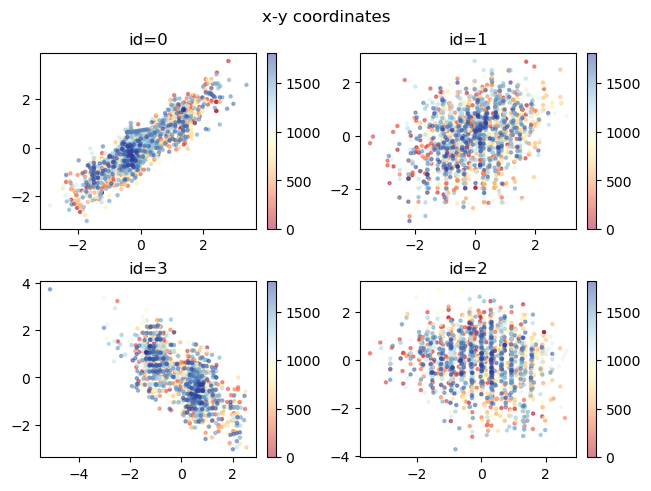

In [81]:
x, y = [2,2]
fig, axs = plt.subplots(y, x, constrained_layout=True)

#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
# axs = [fig.add_subplot(2, 2, 1 + i) for i in range(4)]
cm = plt.cm.get_cmap('RdYlBu') # プロットのカラーマップ
for g, id in zip([(0, 0),(0, 1),(1, 1),(1, 0),], range(4)):
    print(g, id)
    orbit = mean_norm(markers[[(str(id), 'x'),(str(id), 'y')]])
    orbit.columns = orbit.columns.droplevel(0)
    mappable = axs[g].scatter(orbit['x'], orbit['y'], c=list(orbit.index),cmap=cm,s=5, alpha=0.5)
    fig.colorbar(mappable, ax=axs[g])
    axs[g].set_title(f"id={id}")
    
fig.suptitle("x-y coordinates")

# for id in [0,1,2,3]:
#     orbit = markers[[(str(id), 'x'),(str(id), 'y')]]
#     orbit.columns = orbit.columns.droplevel(0)
#     plt.scatter(orbit['x'], orbit['y'], s=5, alpha=0.5)
#     plt.title("x-y coordinates for id=0")

In [74]:
list(orbit.index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
